In [1]:
#DecisionTreeClassifier 
#import required ilbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df=pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#droping index column
df=df.drop("PassengerId",axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#checking null values
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
df.shape[0]

891

In [6]:
#checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [7]:
#checking % of null values
df.isnull().sum()*100/df.shape[0]

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

In [8]:
df["Age"].isnull().sum()*100/df.shape[0]

19.865319865319865

In [9]:
df.shape

(891, 11)

In [10]:
#taking mean for filling null values
m=df["Age"].mean()
m

29.69911764705882

In [11]:
#fill mean of age in null values
df["Age"].fillna(m,inplace=True)

In [12]:
df["Age"].isnull().sum()

0

In [13]:
df["Age"]=df["Age"].astype("int64")

In [14]:
df["Age"].astype("int64")

0      22
1      38
2      26
3      35
4      35
       ..
886    27
887    19
888    29
889    26
890    32
Name: Age, Length: 891, dtype: int64

In [15]:
#as there is 70+% data in the column is null
#so drop the column
df=df.drop("Cabin",axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S


In [16]:
df.shape

(891, 10)

In [17]:
#checking null values
df["Embarked"].isnull().sum()

2

In [18]:
#checking unique values
df["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
#finding counts of values in the column
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [20]:
#filling null values with most number of value_count
df["Embarked"].fillna("S",inplace=True)

In [21]:
df["Embarked"].isnull().sum()

0

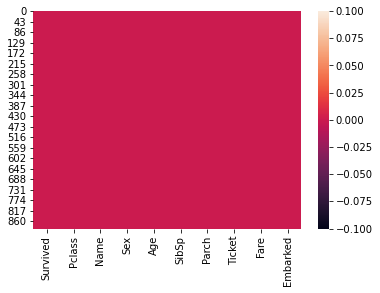

In [22]:
#visualizing dataset is there any null value is there or not
sns.heatmap(df.isnull())
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    int64  
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Embarked  891 non-null    object 
dtypes: float64(1), int64(5), object(4)
memory usage: 69.7+ KB


In [24]:
#seperating columns for label encoder
df1=df.select_dtypes(object)
df1.head()


,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [25]:
df2=df.select_dtypes(["int64","float64"])
df2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22,1,0,7.2500
1,1,1,38,1,0,71.2833
2,1,3,26,0,0,7.9250
3,1,1,35,1,0,53.1000
4,0,3,35,0,0,8.0500


In [26]:
#LabelEncoder for obeject values for discrete dataset
from sklearn.preprocessing import LabelEncoder

In [27]:
for col in df1:
    le=LabelEncoder()
    df1[col]=le.fit_transform(df1[col])

In [28]:
df1.head()

,Name,Sex,Ticket,Embarked
0,108,1,523,2
1,190,0,596,0
2,353,0,669,2
3,272,0,49,2
4,15,1,472,2


In [29]:
#concating df1 and df2 for common dataset
df_new=pd.concat([df1,df2],axis=1)

In [30]:
df_new.head()

,Name,Sex,Ticket,Embarked,Survived,Pclass,Age,SibSp,Parch,Fare
0,108,1,523,2,0,3,22,1,0,7.2500
1,190,0,596,0,1,1,38,1,0,71.2833
2,353,0,669,2,1,3,26,0,0,7.9250
3,272,0,49,2,1,1,35,1,0,53.1000
4,15,1,472,2,0,3,35,0,0,8.0500


In [31]:
#select input and output features of dataset
x=df_new.drop("Survived",axis=1)
y=df_new["Survived"]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [33]:
#traing dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [34]:
#creating function 
def create_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    return model

In [35]:
#creating object of a class
lr=LogisticRegression()

In [36]:
#call function
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.74      0.87      0.80       153
           1       0.78      0.60      0.68       115

    accuracy                           0.75       268
   macro avg       0.76      0.73      0.74       268
weighted avg       0.76      0.75      0.75       268

[[133  20]
 [ 46  69]]


In [37]:
#call DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier

In [38]:
#create the object of DecisionTreeClassifier class
dt=DecisionTreeClassifier()

In [39]:
#create object of the class
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.78      0.85      0.82       153
           1       0.77      0.69      0.73       115

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

[[130  23]
 [ 36  79]]


In [40]:
#information gain of all the inputs
dt.feature_importances_

array([0.14254038, 0.32100818, 0.10344572, 0.03132597, 0.09916996,
       0.15381487, 0.04546433, 0.00537561, 0.09785498])

In [41]:
x.columns

Index(['Name', 'Sex', 'Ticket', 'Embarked', 'Pclass', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

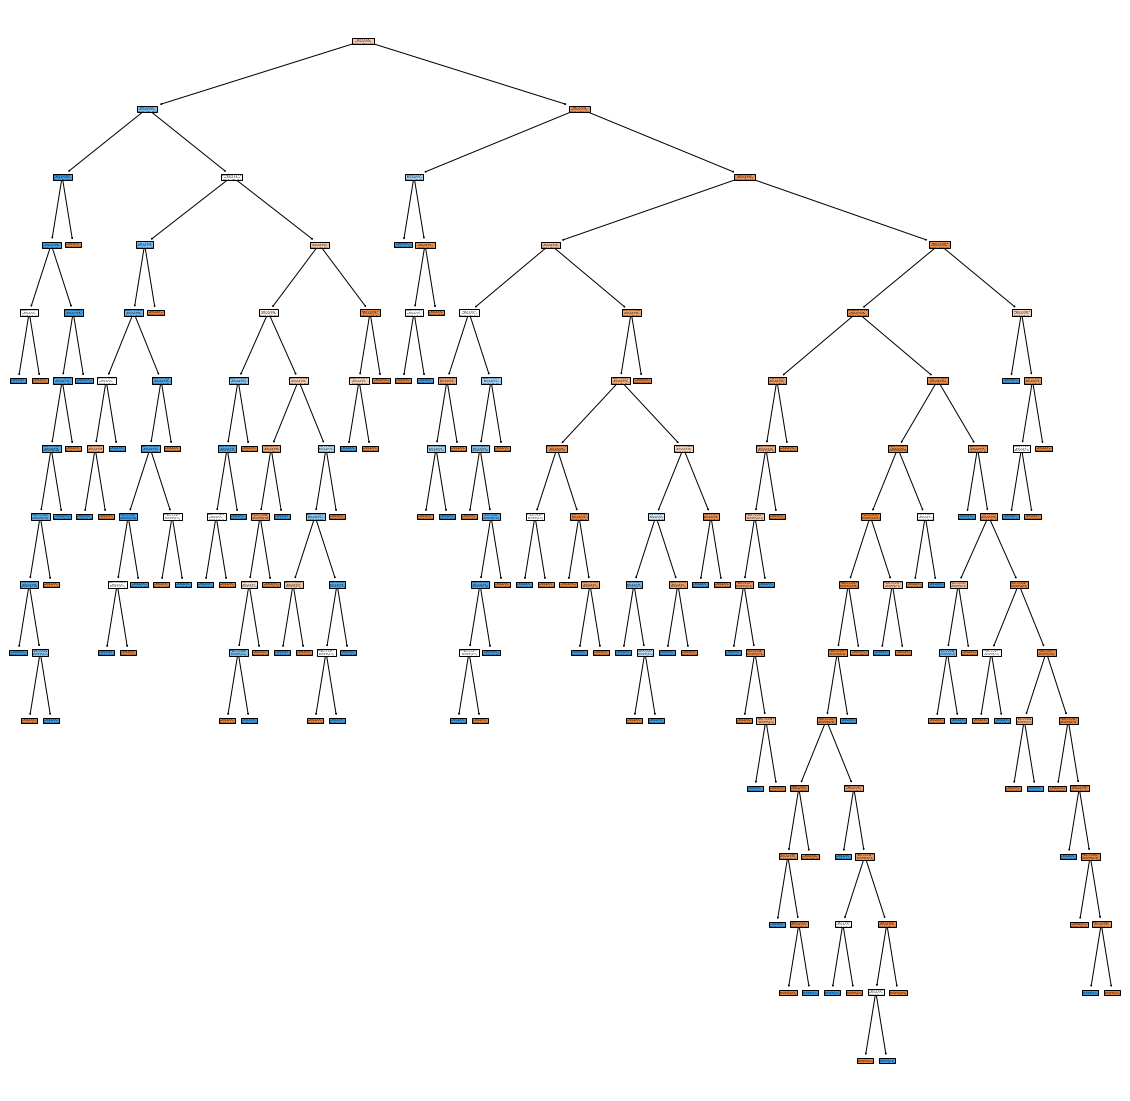

In [42]:
#visualizing tree
from sklearn import tree
features=x.columns
fig=plt.figure(figsize=(20,20))
_=tree.plot_tree(dt,feature_names=features,filled=True)

In [43]:
#reduced a overfitting situation By using the Pruning technique : -
#There are 2 types of pruning technique : -
#1. max_depth : inbulit parameter
#2. min_samples_leaf  : inbuilt parameter
#max_depth : - #Note : max_depth can not more than 8
dt1=DecisionTreeClassifier(max_depth=5) 

In [44]:
#create object of the class
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.75      0.90      0.82       153
           1       0.82      0.60      0.69       115

    accuracy                           0.77       268
   macro avg       0.79      0.75      0.76       268
weighted avg       0.78      0.77      0.77       268

[[138  15]
 [ 46  69]]


In [45]:
#2. min_samples_leaf
dt2=DecisionTreeClassifier(min_samples_leaf=45)#bydefault gini index 

In [46]:
dt2=create_model(dt2)

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       153
           1       0.86      0.57      0.68       115

    accuracy                           0.77       268
   macro avg       0.80      0.75      0.75       268
weighted avg       0.79      0.77      0.76       268

[[142  11]
 [ 50  65]]


In [47]:
#create object of DecisionTreeClassifier class
#bydefault ctiterion ="gini"
dt3=DecisionTreeClassifier(max_depth=5,criterion="entropy") 

In [48]:
dt3=create_model(dt3)

              precision    recall  f1-score   support

           0       0.76      0.86      0.81       153
           1       0.78      0.63      0.70       115

    accuracy                           0.76       268
   macro avg       0.77      0.75      0.75       268
weighted avg       0.77      0.76      0.76       268

[[132  21]
 [ 42  73]]


In [49]:
dt4=DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy") 

In [50]:
dt4=create_model(dt4)

              precision    recall  f1-score   support

           0       0.74      0.93      0.82       153
           1       0.86      0.57      0.68       115

    accuracy                           0.77       268
   macro avg       0.80      0.75      0.75       268
weighted avg       0.79      0.77      0.76       268

[[142  11]
 [ 50  65]]


In [51]:
#Random Forest Tree
#call Random Forest Tree from package
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10,max_features=8,random_state=1)

In [52]:
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       153
           1       0.81      0.63      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268

[[136  17]
 [ 42  73]]


In [53]:
 #ADA Boost : Adapter boosting
from sklearn.ensemble import AdaBoostClassifier

In [54]:
#Create the object of AdaBoostClassifier
#AdaBoost create a decision stump
#work on decision tree classifier
ada=AdaBoostClassifier(n_estimators=100)

In [55]:
model=create_model(ada)

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       153
           1       0.80      0.69      0.74       115

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

[[133  20]
 [ 36  79]]


In [56]:
#Gradient Boosting : - 
#Its basically focus on short comings error  means fully grown tree 
#error means residual =actual output-predicted output
from sklearn.ensemble import GradientBoostingClassifier

In [57]:
#create object of GradientBoostingClassifier class
gbc=GradientBoostingClassifier(n_estimators=50)# n_estimators can be <=100

In [58]:
model=create_model(gbc)

              precision    recall  f1-score   support

           0       0.76      0.89      0.82       153
           1       0.81      0.63      0.71       115

    accuracy                           0.78       268
   macro avg       0.79      0.76      0.77       268
weighted avg       0.78      0.78      0.77       268

[[136  17]
 [ 42  73]]


In [59]:
 #Extreme Gradient Boosting  : 3rd technique of Boosting 
#This is better version of gradient boosting . . short form XGB 
#better version of Gradient Boosting : -
#1. XG Bossting use : - Multithreading technique
#2. It takes less memory space and faster 
#3. It is very useful to handle huge amt of data .Its deal large amount of data
#4. Its handle outlier because have inbuilt capability
#5. Its handle null values 
#6. Its handle automatic overfitting situation .
#7 it diffrentiate the model d/dw(error)

In [60]:
from xgboost import XGBClassifier

In [61]:
#create object of XGBClassifier class and passing the parameter
xgb=XGBClassifier(n_estimators=100,reg_alpha=1)

In [62]:
#calling function
model=create_model(xgb)

[17:35:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       153
           1       0.78      0.65      0.71       115

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268

[[132  21]
 [ 40  75]]
